# Project: Wrangling and Analyze Data

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
% matplotlib inline

## Data Gathering

In [2]:
#read the twitter csv file 
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#using requests, read the tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)
df_image = pd.read_csv('image-predictions.tsv' , sep = '\t')

In [4]:
#read the json text and the required columns
df = []
with open('tweet_json.txt' , 'r') as file:
    for line in open('tweet_json.txt' , 'r'):
        data = json.loads(line)
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        df.append({'tweet_id' : tweet_id, 'favorite_count' : favorite_count, 'retweet_count' : retweet_count})
df_json = pd.DataFrame(df, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data


In [5]:
#accessing the archive data
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* The in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have empty values.

* The source text is embedded in the source url.

* The dogger, floofer, pupper and puppo columns should all be under one column as it represents only one variable (dog stage). This is a tidiness issue.

In [6]:
#assessing the archive information 
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* The datatype of the 'tweet_id' is in integer, and should be converted to string.
* The timestamp is in object, and should be converted to datetime.

In [7]:
#Understanding the descriptive statistics summary of the archive data
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* The rating numerator and denominator columns have some wrong values.

In [8]:
#checking the duplicated values in the data
archive.duplicated().sum()

0

In [9]:
#checking the unusual dog names
archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Buddy          7
Daisy          7
Bailey         7
an             7
Dave           6
Milo           6
Rusty          6
Jax            6
Koda           6
Oscar          6
Stanley        6
Scout          6
Jack           6
Leo            6
Bella          6
Sammy          5
            ... 
Marty          1
Monty          1
Vixen          1
Bilbo          1
Kramer         1
Tripp          1
Sora           1
Tobi           1
Luther         1
Sage           1
Poppy          1
Kollin         1
Snoopy         1
Erik           1
DayZ           1
Rupert         1
Emma           1
Gòrdón         1
Gustaf         1
Hermione       1
Bobby          1
Genevieve      1
Goose          1
Tommy          1
Jay            1
Billy          1
Gunner         1
Dixie         

* Some of the names are 'none', 'a', 'an', 'this' etc. are not dog names

In [10]:
#assessing the image dataset
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


* The dog breeds columns (p1, p2 and p3) have inconsistent case sensitivies.

In [11]:
#Assessing the information of the image dataset
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* The datatype of the 'tweet_id' is in integer, and should be converted to string.

In [12]:
#Understanding the descriptive statistics summary of the image data
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
#checking the duplicated values in the data
df_image.duplicated().sum()

0

In [14]:
#assessing the jason text data
df_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [15]:
##Assessing the information of the jason dataset
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


* The datatype of the 'tweet_id' is in integer, and should be converted to string.

In [16]:
#Understanding the descriptive statistics summary of the json data
df_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [17]:
#checking the duplicated values in the data
df_json.duplicated().sum()

0

### Quality issues

1. The in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have empty values.

2.  Drop unnecessary columns

3. The datatype of the 'tweet_id' is in integer, and should be converted to string (for all the three data)

4. The source text is embedded in the source url.

5. The timestamp is in object datatype, and should be converted to datetime.

6. The rating numerator and denominator column have some wrong values.

7. Some of the names 'none', 'a', 'an', 'this' etc. are not dog names.

8. The dog breeds columns (p1, p2 and p3) have inconsistent case sensitivies.

### Tidiness issues
1. The dogger, floofer, pupper and puppo columns should all be under one column as it represents only one variable (dog stage). 

2. Merge the archive data, df_image and df_json into one master data dataset.

## Cleaning Data


In [18]:
# Making copies of original pieces of data
archive_clean = archive.copy()
image_clean = df_image.copy()
counts_clean = df_json.copy()

#### Define: Removing rows with 'retweeted_status_id' 

#### Code

In [19]:
#dropping the unnecessary rows
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#### Test

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define: Dropping the unnecessary columns

#### Code

In [21]:
#dropping the unnecessary columns
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                    'retweeted_status_id','retweeted_status_user_id',
                    'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define: Changing the datatype of the tweet_id to string (all the three data)

#### Code

In [23]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#### Test

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB


#### Code

In [25]:
#converting to string
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

#### Test

In [26]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Code

In [27]:
#converting to string
counts_clean['tweet_id'] = counts_clean['tweet_id'].astype(str)

#### Test

In [28]:
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define: The source text is embedded in the source url

#### Code

In [29]:
# create a dict of the source keys with its values
source_text = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'}

#replacing key with values
def rename_source(data):
    if data['source'] in source_text.keys():
        abbreviation = source_text[data['source']]
        return abbreviation
    else:
        return data['source']

archive_clean.source = archive_clean.apply(rename_source, axis=1)

#### Test

In [30]:
archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define: Converting the timestamp to datetime

#### Code

In [31]:
#converting to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


#### Define: The rating numerator and denominator column have some wrong values.

#### Code

In [33]:
#comparing the rating numerators and denominators with the texts
pd.set_option('display.max_colwidth', -1)
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None


In [34]:
#replacing the ratings that are wrong
archive_clean.loc[archive_clean.tweet_id==835246439529840640,['rating_numerator','rating_denominator']]=[13,10]
archive_clean.loc[archive_clean.tweet_id==740373189193256964,['rating_numerator','rating_denominator']]=[14,10]
archive_clean.loc[archive_clean.tweet_id==722974582966214656,['rating_numerator','rating_denominator']]=[13,10]
archive_clean.loc[archive_clean.tweet_id==716439118184652801,['rating_numerator','rating_denominator']]=[11,10]
archive_clean.loc[archive_clean.tweet_id==682962037429899265,['rating_numerator','rating_denominator']]=[10,10]
archive_clean.loc[archive_clean.tweet_id==666287406224695296,['rating_numerator','rating_denominator']]=[9,10]

In [35]:
#fixing rating numerators with decimal values that were incorrecly extracted
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
archive_clean.rating_numerator = ratings
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

#### Test

In [36]:
archive_clean[archive_clean.rating_numerator == 9.75]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None


#### Define: Some of the names 'None', 'a', 'an', 'this' etc. are not dog names.

#### Code

In [37]:
#checking all dog names in lowercase
mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[mask].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              6 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            3 
life            1 
light           1 
mad             1 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           3 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [38]:
#dropping all dog names in lowercase
archive_clean = archive_clean[archive_clean['name'].str[0].str.isupper()]

In [39]:
#verifying the changes made
archive_clean.name.value_counts()

None        680
Lucy        11 
Charlie     11 
Cooper      10 
Oliver      10 
Penny       9  
Tucker      9  
Winston     8  
Lola        8  
Sadie       8  
Toby        7  
Daisy       7  
Stanley     6  
Bella       6  
Bo          6  
Jax         6  
Bailey      6  
Oscar       6  
Koda        6  
Scout       5  
Louis       5  
Milo        5  
Bentley     5  
Chester     5  
Dave        5  
Leo         5  
Rusty       5  
Buddy       5  
Reggie      4  
Archie      4  
           ..  
Teddy       1  
Koko        1  
Strider     1  
Kial        1  
Traviss     1  
Kenny       1  
Stewie      1  
Mo          1  
Harlso      1  
Eevee       1  
Evy         1  
Tove        1  
Yoda        1  
Link        1  
Sobe        1  
Brutus      1  
Beya        1  
Brat        1  
Clyde       1  
Peanut      1  
Emmie       1  
Ashleigh    1  
Devón       1  
Carbon      1  
Happy       1  
Obie        1  
Leonard     1  
Norman      1  
Brockly     1  
Lipton      1  
Name: name, Length: 931,

In [40]:
# replace the None dog name with unknown
archive_clean.name.replace('None', 'Unknown', inplace = True)

#### Test

In [41]:
archive_clean.name.value_counts()

Unknown     680
Lucy        11 
Charlie     11 
Cooper      10 
Oliver      10 
Penny       9  
Tucker      9  
Sadie       8  
Winston     8  
Lola        8  
Toby        7  
Daisy       7  
Bella       6  
Bo          6  
Jax         6  
Stanley     6  
Bailey      6  
Oscar       6  
Koda        6  
Scout       5  
Bentley     5  
Louis       5  
Milo        5  
Chester     5  
Dave        5  
Leo         5  
Buddy       5  
Rusty       5  
Reggie      4  
Jack        4  
           ..  
Teddy       1  
Koko        1  
Strider     1  
Kial        1  
Traviss     1  
Kenny       1  
Stewie      1  
Mo          1  
Harlso      1  
Eevee       1  
Evy         1  
Tove        1  
Yoda        1  
Link        1  
Sobe        1  
Brutus      1  
Beya        1  
Brat        1  
Clyde       1  
Peanut      1  
Emmie       1  
Ashleigh    1  
Devón       1  
Carbon      1  
Happy       1  
Obie        1  
Leonard     1  
Norman      1  
Brockly     1  
Lipton      1  
Name: name, Length: 931,

#### Define: The dog breeds columns (p1, p2 and p3) have inconsistent case sensitivies.

#### Code

In [42]:
#standardize the dog breed column by changing to lowercase
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

#### Test

In [43]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Tidiness Issues

#### Define: Creating a new 'dog_stage' column and dropping the doggo, floofer, pupper and puppo columns

#### Code

In [44]:
# replacing the 'None' values with ''

archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace = True)
archive_clean.puppo.replace('None', '', inplace = True)

#creating a new column 

archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [45]:
archive_clean.dog_stage.value_counts()

                1741
pupper          213 
doggo           73  
puppo           24  
floofer         9   
doggopupper     9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

In [46]:
#replacing the blank cells with unknown
archive_clean.dog_stage.replace('','Unknown', inplace=True)

archive_clean.dog_stage.value_counts()

Unknown         1741
pupper          213 
doggo           73  
puppo           24  
floofer         9   
doggopupper     9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

In [47]:
# dropping the unnecessary columns
archive_clean.drop(['doggo','pupper','floofer','puppo'], axis=1,inplace=True)

#### Test

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_stage             2071 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 161.8+ KB


#### Define: Merging all the data into one master data dataset.

#### Code

In [49]:
twitter_archive_master = pd.merge(archive_clean, counts_clean, on='tweet_id', how='inner')

In [50]:
twitter_archive_master = pd.merge(twitter_archive_master, image_clean, on='tweet_id', how='inner')

#### Test

In [51]:
twitter_archive_master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
344,816450570814898180,2017-01-04 01:05:59,Twitter for iPhone,Meet Moose. He doesn't want his friend to go back to college. 13/10 looks like you're staying home John https://t.co/LIhmM7i70k,"https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rates/status/816450570814898180/photo/1",13.0,10,Moose,Unknown,33961,...,1,web_site,0.352857,False,envelope,0.060107,False,nail,0.031291,False
188,844979544864018432,2017-03-23 18:29:57,Twitter for iPhone,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13.0,10,Unknown,Unknown,14738,...,3,tennis_ball,0.999281,False,racket,0.000370,False,shetland_sheepdog,0.000132,True


## Storing Data


In [52]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [53]:
#finding the most common dog names
twitter_archive_master.name.value_counts().head(5)

Unknown    546
Charlie    11 
Lucy       10 
Oliver     10 
Cooper     10 
Name: name, dtype: int64

Although a lot of dog names are unknown, Charlie, Lucy, Cooper, Oliver seems to be the most common dog names.

In [54]:
#checking the dog stage with the highest frequency
twitter_archive_master.dog_stage.value_counts()

Unknown         1602
pupper          194 
doggo           61  
puppo           22  
doggopupper     8   
floofer         7   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

Pupper has the highest frequency amongst the dog stages.

In [55]:
#finding out the source of the tweets
twitter_archive_master.source.value_counts()

Twitter for iPhone    1861
Twitter Web Client    25  
TweetDeck             10  
Name: source, dtype: int64

Majority of the tweets were sent via iPhone while minority were sent via Web then TweetDeck.

### Insights:
1. Although a lot of dog names are unknown. Charlie, Lucy, Cooper, Oliver seems to be the most common dog names.

2. Pupper has the highest frequency amongst the dog stages.

3. Majority of the tweets were sent via iPhone while minority were sent via Web then TweetDeck.

### Visualization

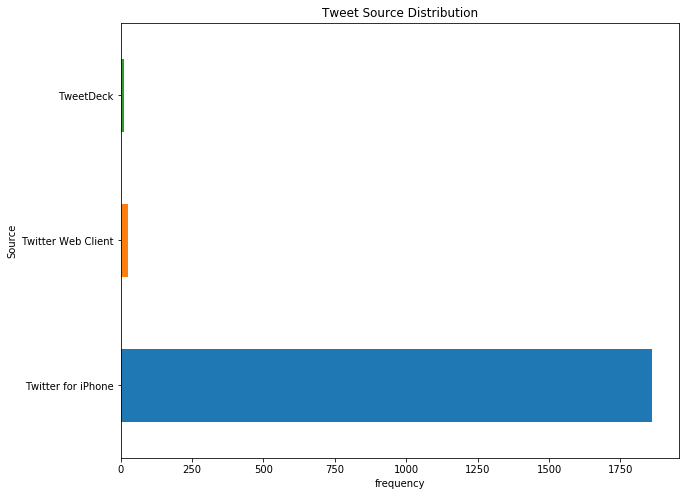

In [56]:
#distribution of the tweets source
twitter_archive_master.source.value_counts().plot(kind='barh', figsize = (10,8));
plt.xlabel('frequency');
plt.ylabel('Source');
plt.title('Tweet Source Distribution');

From the bar plot above, it is evident majority of the tweets were sent via iPhone.